In [5]:
import pandas as pd
import datetime
import ast
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import collections

In [7]:
ted_main = pd.read_csv('ted_main.csv')

In [8]:
ted_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
ted_main.tags

0       ['children', 'creativity', 'culture', 'dance',...
1       ['alternative energy', 'cars', 'climate change...
2       ['computers', 'entertainment', 'interface desi...
3       ['MacArthur grant', 'activism', 'business', 'c...
4       ['Africa', 'Asia', 'Google', 'demo', 'economic...
                              ...                        
2545    ['TED Residency', 'United States', 'community'...
2546    ['Mars', 'South America', 'TED Fellows', 'astr...
2547    ['AI', 'ants', 'fish', 'future', 'innovation',...
2548    ['Internet', 'TEDx', 'United States', 'communi...
2549    ['cities', 'design', 'future', 'infrastructure...
Name: tags, Length: 2550, dtype: object

In [10]:
#Converting UNIX timestamp to YYYY-mm-dd datetime format
ted_main['film_date'] = ted_main['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%Y-%m-%d'))
ted_main['published_date'] = ted_main['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%Y-%m-%d'))

ted_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# WordCloud

In [11]:
tags_list = []
for i, r in ted_main.iterrows():
    x = ast.literal_eval(r['tags'])
    for w in x:
        if type(w) is dict:
            x = w['text']
            tags_list.append(x)
        else:
            tags_list.append(w)

In [ ]:
#tags_list

In [ ]:
#temp_set = set(tags_list)
#tags_list = list(temp_set)
#tags_list

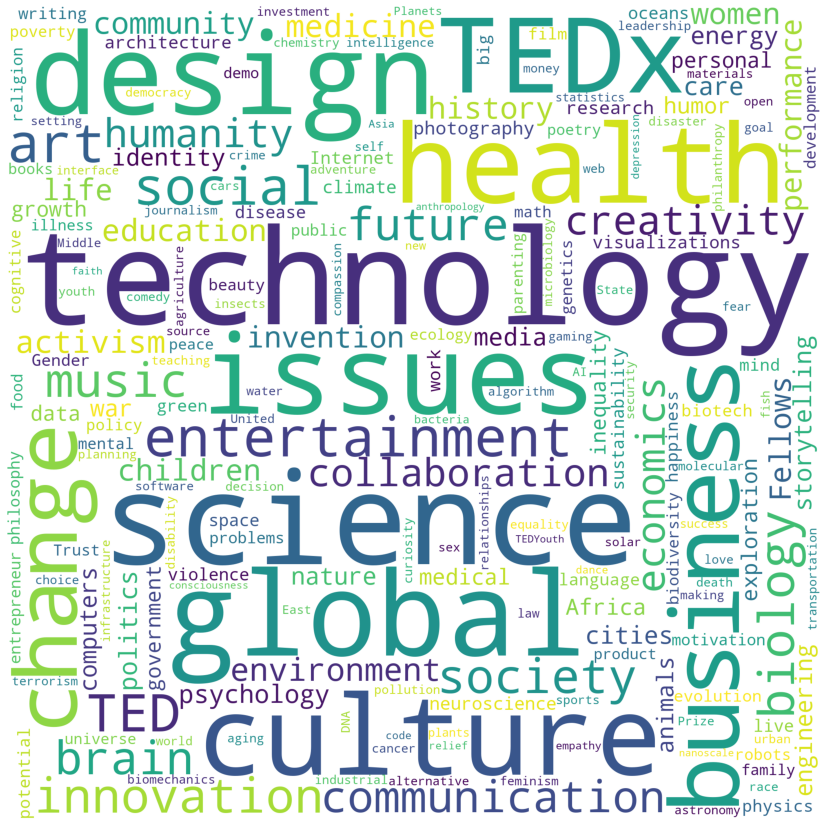

In [12]:
tags_string=(" ").join(tags_list)
wordcloud = WordCloud(width = 2000, height = 2000, background_color = 'white', relative_scaling=0.5, collocations=False).generate(tags_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
l1 = list(tags_string)

In [14]:
#filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(tags_list)

tags = []
counts = []
for letter, count in counted_words.most_common(10):
    tags.append(letter)
    counts.append(count)

In [15]:
counted_words

Counter({'3d printing': 3,
         'AI': 43,
         'AIDS': 16,
         'Addiction': 5,
         'Africa': 105,
         "Alzheimer's": 6,
         'Anthropocene': 14,
         'Asia': 26,
         'Autism spectrum disorder': 10,
         'Bioethics': 23,
         'Blindness': 12,
         'Brand': 3,
         'Brazil': 10,
         'Buddhism': 7,
         'CRISPR': 4,
         'Christianity': 6,
         'Criminal Justice': 10,
         'DNA': 46,
         'Debate': 7,
         'Egypt': 14,
         'Europe': 18,
         'Foreign Policy': 8,
         'Gender equality': 34,
         'Gender spectrum': 6,
         'God': 16,
         'Google': 10,
         'Guns': 6,
         'HIV': 6,
         'Human body': 10,
         'Internet': 84,
         'Iran': 5,
         'Islam': 9,
         'LGBT': 14,
         'MacArthur grant': 13,
         'Mars': 12,
         'Middle East': 32,
         'Moon': 3,
         'NASA': 21,
         'Natural resources': 12,
         'New York': 8,
       

## Visualizing Tags

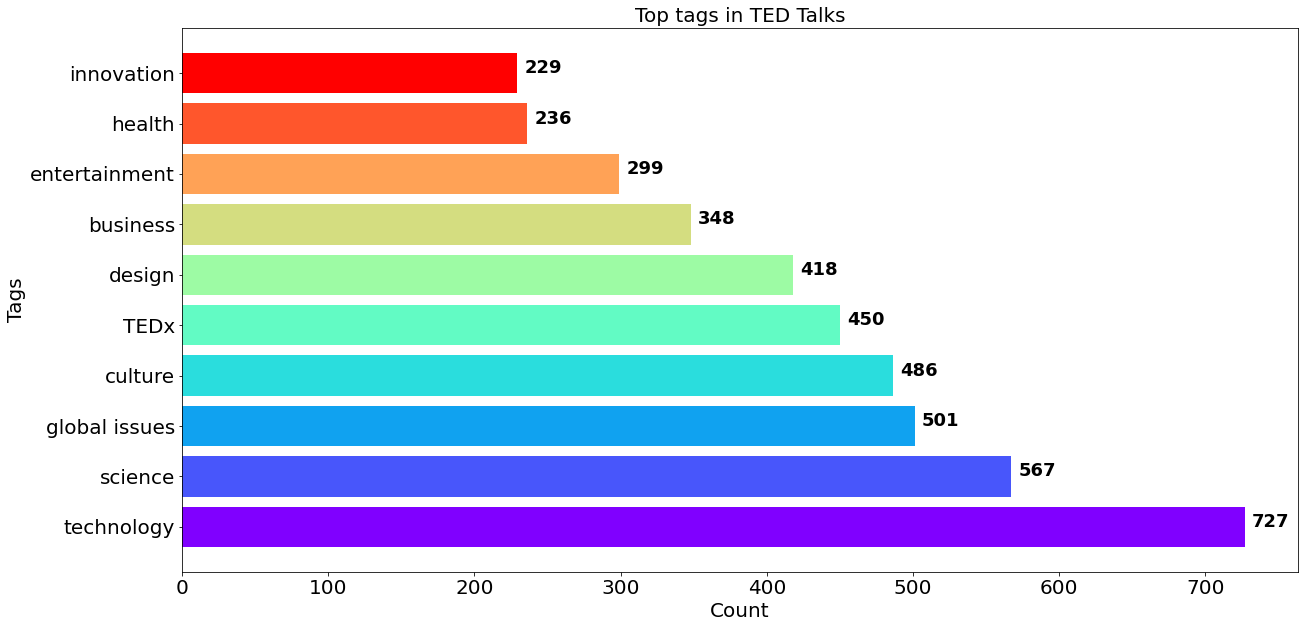

In [16]:
#Visualizing most frequent tags
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
fig, ax = plt.subplots()    

plt.title('Top tags in TED Talks', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Tags', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.barh(tags, counts, color=colors)
for i, v in enumerate(counts):
    ax.text(v + 5, i, str(v), fontweight='bold', fontsize=18)

In [17]:
#Sort by most frequent tags
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [18]:
#Checking most frequent tags
sort_dict = sortFreqDict(counted_words)
for s in sort_dict: print(str(s))

(727, 'technology')
(567, 'science')
(501, 'global issues')
(486, 'culture')
(450, 'TEDx')
(418, 'design')
(348, 'business')
(299, 'entertainment')
(236, 'health')
(229, 'innovation')
(224, 'society')
(221, 'art')
(218, 'social change')
(195, 'future')
(191, 'communication')
(189, 'creativity')
(189, 'biology')
(182, 'humanity')
(174, 'collaboration')
(165, 'environment')
(164, 'economics')
(162, 'medicine')
(158, 'brain')
(157, 'activism')
(153, 'education')
(148, 'community')
(146, 'history')
(143, 'children')
(143, 'TED Fellows')
(140, 'music')
(140, 'invention')
(132, 'health care')
(128, 'politics')
(123, 'cities')
(122, 'psychology')
(120, 'storytelling')
(117, 'women')
(117, 'performance')
(116, 'nature')
(113, 'war')
(113, 'identity')
(111, 'life')
(111, 'engineering')
(111, 'computers')
(109, 'animals')
(105, 'humor')
(105, 'Africa')
(100, 'exploration')
(96, 'personal growth')
(94, 'inequality')
(94, 'data')
(93, 'government')
(92, 'photography')
(92, 'medical research')
(89,

# Top 10 Viewed

In [19]:
#top 10 viewed
top10_viewed = ted_main[['title', 'main_speaker', 'views', 'film_date', 'tags']].sort_values('views', ascending=False)[:10]
top10_viewed

,title,main_speaker,views,film_date,tags
0,Do schools kill creativity?,Ken Robinson,47227110,2006-02-25,"['children', 'creativity', 'culture', 'dance',..."
1346,Your body language may shape who you are,Amy Cuddy,43155405,2012-06-26,"['body language', 'brain', 'business', 'psycho..."
677,How great leaders inspire action,Simon Sinek,34309432,2009-09-17,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
837,The power of vulnerability,Brené Brown,31168150,2010-06-06,"['TEDx', 'communication', 'culture', 'depressi..."
452,10 things you didn't know about orgasm,Mary Roach,22270883,2009-02-06,"['books', 'culture', 'history', 'humor', 'scie..."
1776,How to speak so that people want to listen,Julian Treasure,21594632,2013-06-10,"['culture', 'sound', 'speech']"
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-02-27,"['biology', 'brain', 'consciousness', 'global ..."
5,Why we do what we do,Tony Robbins,20685401,2006-02-02,"['business', 'culture', 'entertainment', 'goal..."
2114,This is what happens when you reply to spam email,James Veitch,20475972,2015-12-08,"['comedy', 'communication', 'curiosity', 'humo..."
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,2012-10-27,"['TEDx', 'beauty', 'culture', 'fashion', 'phot..."


In [20]:
top10_viewed.to_csv('top10_viewed.csv')

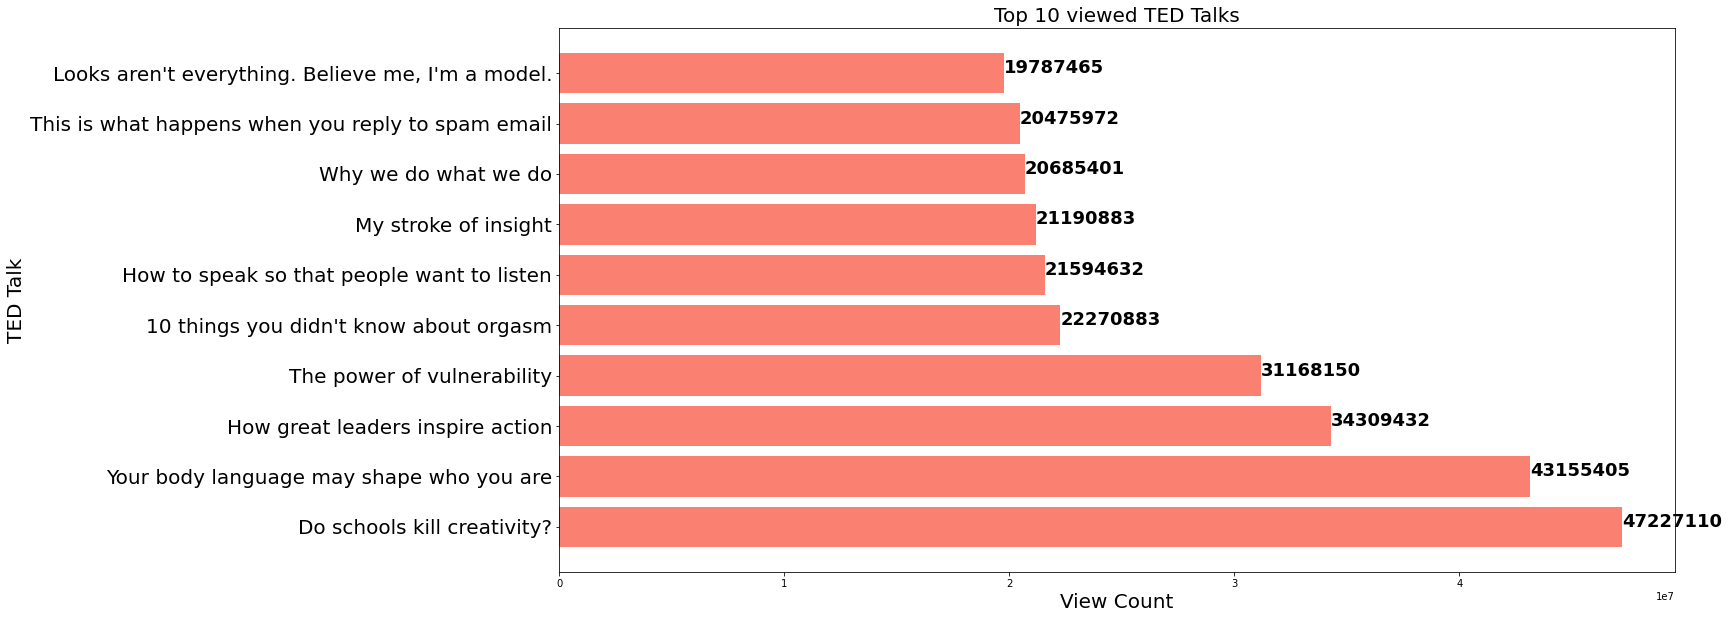

In [21]:
#Visualizing most frequent tags
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
fig, ax = plt.subplots()    
plt.title('Top 10 viewed TED Talks', fontsize=20)
plt.xlabel('View Count', fontsize=20)
plt.ylabel('TED Talk', fontsize=20)
#plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.barh(top10_viewed['title'], top10_viewed['views'], color='salmon')
for i, v in enumerate(top10_viewed['views']):
    ax.text(v, i, str(v), fontweight='bold', fontsize=18)

# HeatMap

In [22]:
import seaborn as sns

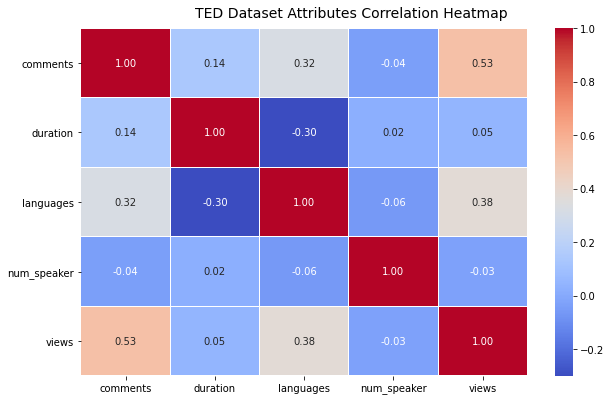

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
corr = ted_main.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('TED Dataset Attributes Correlation Heatmap', fontsize=14)